In [1]:
import numpy as np

data_src = 's-svm'

x_train = np.load('./data/{}/train_data.npy'.format(data_src))
y_train = np.load('./data/{}/train_target.npy'.format(data_src))
x_test = np.load('./data/{}/test_data.npy'.format(data_src))
y_test = np.load('./data/{}/test_target.npy'.format(data_src))

class LinearSVM:
    def __init__(self, x_train, y_train, C=1.0, eta=0.01, max_iter=100000, model='sgd', kernel='linear', sigma=1):
        self.x_train = x_train
        self.y_train = y_train
        self.C = C
        self.eta = eta  # 学习率
        self.w = np.random.uniform(0, 1, self.x_dim)
        self.b = np.random.randn(1) * x_train[:, 1].std(ddof=1) + x_train[:, 1].mean()
        self.max_iter = max_iter
        self.model = model
        self.kernel = kernel
    
    def kerfun(x, y):
        assert len(x.shape) == 1 and len(y.shape) == 1
        if self.kernel == 'gaussian':
            return np.exp(-(x-y)**2/(2*self.sigma))
        else:
            return x @ y
        
    @property
    def x_dim(self):
        return len(self.x_train[0])
        
    @property
    def m(self):
        return self.x_train.shape[0]
    
    def train(self):
        if self.model == 'sgd':
            for _ in range(self.max_iter):
                e = 1 - self.y_train * (self.x_train @ self.w + self.b)
                i = np.argmax(e)
                if _ % 20000 == 19999:
                    print(lsvm.w, lsvm.b)
                self.w = (1-self.eta) * self.w + self.eta * self.C * (self.x_train[i] * self.y_train[i])
                self.b = self.b + self.eta * self.C * self.y_train[i]
        elif self.model == 'gd':
            for _ in range(self.max_iter):
                if _ % 10000 == 9999:
                    print(lsvm.w, lsvm.b)
                for i in range(self.m):
                    e = 1 - self.y_train[i] * (self.x_train[i] @ self.w + self.b)
                    if e > 0:
                        self.w = (1-self.eta) * self.w + self.eta * self.C * (self.x_train[i] * self.y_train[i])
                        self.b = self.b + self.eta * self.C * self.y_train[i]
            

    def predict(self, x_test):
        return np.sign(x_test @ self.w + self.b)
    
    def test(self, x_test, y_test):
        x_test = np.array(x_test)
        p = self.predict(x_test)
        acc = 1-np.sum(np.abs(p - y_test)) / (2*self.m)
        return p, acc
    
    def get_xxyy(self, span):
        xx = np.linspace(*span, (span[1]-span[0])*100)
        yy = (-self.b-self.w[0]*xx) / self.w[1]
        return xx, yy

In [2]:
np.random.seed(2019)
lsvm = LinearSVM(x_train, y_train, eta=0.001, max_iter=100000, model='sgd')

lsvm.train()
print(lsvm.test(x_train, y_train)[1])
print(lsvm.test(x_test, y_test)[1])

[ 0.47510674 -1.0072253 ] [7.47996107]
[ 0.23267955 -0.48652349] [3.65796107]
[ 0.0744113  -0.15536182] [1.16996107]
[ 0.00322698 -0.00089506] [0.06196107]
[ 0.00318882 -0.00247375] [0.06196107]
0.9285714285714286
0.9714285714285714


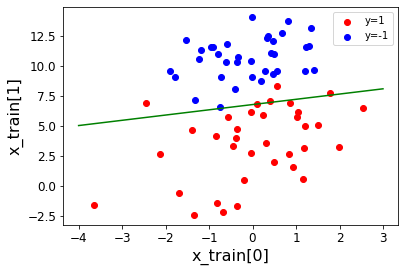

In [3]:
import matplotlib.pyplot as plt

xx, yy = lsvm.get_xxyy((int(np.floor(x_train[:, 0].min())), int(np.ceil(x_train[:, 0].max()))))
plt.xlabel('x_train[0]', size=16)
plt.ylabel('x_train[1]', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
red = np.where(y_train == 1)
blue = np.where(y_train == -1)
plt.scatter(x_train[red][:, 0], x_train[red][:, 1], c='red', label='y=1')
plt.scatter(x_train[blue][:, 0], x_train[blue][:, 1], c='blue', label='y=-1')
plt.legend()
plt.plot(xx, yy, c='green')

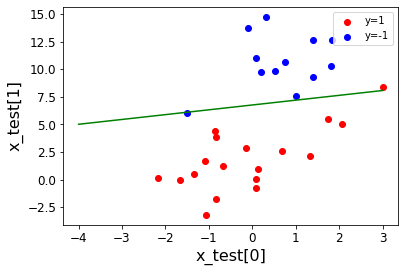

In [4]:
import matplotlib.pyplot as plt

xx, yy = lsvm.get_xxyy((-4, 3))
plt.xlabel('x_test[0]', size=16)
plt.ylabel('x_test[1]', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
red = np.where(y_test == 1)
blue = np.where(y_test == -1)
plt.scatter(x_test[red][:, 0], x_test[red][:, 1], c='red', label='y=1')
plt.scatter(x_test[blue][:, 0], x_test[blue][:, 1], c='blue', label='y=-1')
plt.legend()
plt.plot(xx, yy, c='green')

In [5]:
lsvm = LinearSVM(x_train, y_train, max_iter=30, model='gd')

lsvm.train()
print(lsvm.test(x_train, y_train)[1])
print(lsvm.test(x_test, y_test)[1])

0.9428571428571428
0.9714285714285714


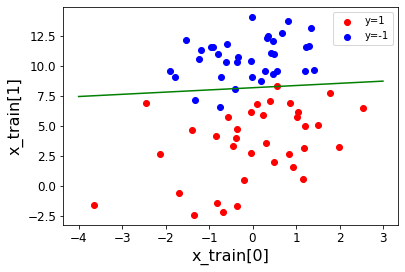

In [6]:
import matplotlib.pyplot as plt

xx, yy = lsvm.get_xxyy((int(np.floor(x_train[:, 0].min())), int(np.ceil(x_train[:, 0].max()))))
plt.xlabel('x_train[0]', size=16)
plt.ylabel('x_train[1]', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
red = np.where(y_train == 1)
blue = np.where(y_train == -1)
plt.scatter(x_train[red][:, 0], x_train[red][:, 1], c='red', label='y=1')
plt.scatter(x_train[blue][:, 0], x_train[blue][:, 1], c='blue', label='y=-1')
plt.legend()
plt.plot(xx, yy, c='green')

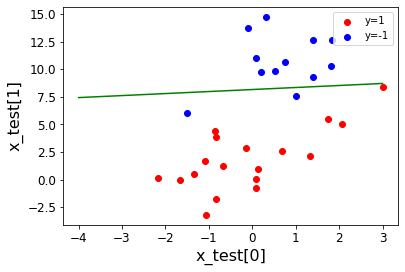

In [7]:
import matplotlib.pyplot as plt

xx, yy = lsvm.get_xxyy((int(np.floor(x_train[:, 0].min())), int(np.ceil(x_train[:, 0].max()))))
plt.xlabel('x_test[0]', size=16)
plt.ylabel('x_test[1]', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
red = np.where(y_test == 1)
blue = np.where(y_test == -1)
plt.scatter(x_test[red][:, 0], x_test[red][:, 1], c='red', label='y=1')
plt.scatter(x_test[blue][:, 0], x_test[blue][:, 1], c='blue', label='y=-1')
plt.legend()
plt.plot(xx, yy, c='green')